# Traducción de Imágenes


---


[Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks](https://arxiv.org/pdf/1703.10593v6.pdf).<br>
[Jun-Yan Zhu](https://people.eecs.berkeley.edu/~junyanz/)\*,  [Taesung Park](https://taesung.me/)\*, [Phillip Isola](https://people.eecs.berkeley.edu/~isola/), [Alexei A. Efros](https://people.eecs.berkeley.edu/~efros). In ICCV 2017. (* equal contributions)


---
## Integrantes

*   Montalvo García, Peter
*   Rojas Bustamante, Leibnitz Pavel

## Descripción

Este notebook muestra la traducción de imagen a imagen a través de una arquitectura de redes neuronales conocida como CycleGan, tal como se describe en el artículo:  [Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks](https://arxiv.org/pdf/1703.10593v6.pdf). El modelo propone un método para capturar las características de un dominio de imagen y descubrir de qué forma estas características podrían traducirse a otro dominio de imagem; todo en ausencia de ejemplos de entrenamiento emparejados.

CycleGan utiliza un función de pérdida cíclica para permitir que el entrenamiento se realice sin necesidad de emparejar los datos. En otras palabras, puede traducir de un dominio X a un dominio Y si necesidad de mapear uno a uno cada elemento en los dominios origen y destino.


# Instalación
Instalamos algunas librerías que son necesarias para la correcta ejecución del notebook.

In [0]:
#Conexión a GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Cargamos el directorio de trabajo del proyecto.
import os

wd = "/content/drive/My Drive/Ciclo03/DeepLearning/Proyecto/CycleGAN/pytorch-CycleGAN-and-pix2pix"
os.chdir(wd)
!ls

 checkpoints	       docs		 options	    test.py
 CycleGAN.ipynb        environment.yml	 pix2pix.ipynb	    train.py
'CycleGAN - PyTorch'   imgs		 README.md	    util
 data		       LICENSE		 requirements.txt
 datasets	       models		 scripts


In [0]:
#Instalamos librerías 
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 15.7MB/s 
     |████████████████████████████████| 204kB 50.7MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=790da5ce2f5c7b02d159307b5750a82a4dbc68e71654f8ad919b9831ccaebcfa
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=690361c37ddb61e24322efc908337c4e3a4d8cd6949e5fbf905245d942952f91
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Descargamos alguno de los Datasets oficiales usando la siquiente sentencia bash.

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Si deseamos utilizar un dataset propio, debemos seguir los siguientes pasos:

- Crear la carpeta para el nuevo dataset en `/dataset`
- Crear las subcarpetas `testA`, `testB`, `trainA`, `trainB`. Colocamos cualquier imagen que queramos transformar de A hacia B en la carpeta `testA` y de B hacias A en la carpeta `testB`. Lo mismo se procede con las carpetas de entrenamiento `trainA` y `trainB`.

In [0]:
#En nuetro caso, descargamos el dataset horse2zebra
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

Specified [horse2zebra]
for details.

--2020-06-10 03:06:18--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘./datasets/horse2zebra.zip’

./datasets/horse2ze 100%[===================>] 111.45M  14.3MB/s    in 9.2s    

2020-06-10 03:06:28 (12.1 MB/s) - ‘./datasets/horse2zebra.zip’ saved [116867962/116867962]

mkdir: cannot create directory ‘./datasets/horse2zebra/’: File exists
Archive:  ./datasets/horse2zebra.zip
replace ./datasets/horse2zebra/trainA/n02381460_6223.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Modelos pre Entrenados

Podemos descargar modelos oficiales ya entrenados mediante la siguiente sentencia `bash`:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

El modelo será agregado en la ruta: `./checkpoints/{NAME}_pretrained/`

In [0]:
#Descargamos el modelo preentrenado para transformar caballos a zebras: horse2zebra
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2020-06-10 03:15:19--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  12.6MB/s    in 3.9s    

2020-06-10 03:15:23 (11.0 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [0]:
!ls checkpoints/horse2zebra/

10_net_D_A.pth	20_net_D_A.pth	30_net_D_A.pth	latest_net_D_A.pth
10_net_D_B.pth	20_net_D_B.pth	30_net_D_B.pth	latest_net_D_B.pth
10_net_G_A.pth	20_net_G_A.pth	30_net_G_A.pth	latest_net_G_A.pth
10_net_G_B.pth	20_net_G_B.pth	30_net_G_B.pth	latest_net_G_B.pth
15_net_D_A.pth	25_net_D_A.pth	5_net_D_A.pth	loss_log.txt
15_net_D_B.pth	25_net_D_B.pth	5_net_D_B.pth	train_opt.txt
15_net_G_A.pth	25_net_G_A.pth	5_net_G_A.pth	web
15_net_G_B.pth	25_net_G_B.pth	5_net_G_B.pth


In [0]:
!ls checkpoints/horse2zebra_pretrained/

latest_net_G.pth


# Training

En esta sección procedemos a entrenar el modelo CycleGan. Para ello ejecutamos el script `train.py` y le pasamos algunos parámetros básicos como:

- `--dataroot` ruta del dataset
- `--name` nombre del modelo
- `--batch_size` tamaño del batch
- `--verbose` para visualizar el log de entrenamiento
- `--n_epochs` cantidad de épocas

`python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --n_epochs 50` 

Una vez que el modelo es entrenado, debemos copiar el último checkpoint al formato en el cual el modelo de prueba pueda automáticamente leerlo. Para ello ejecutamos la siguiente sentencia `bash`

Para transformar images de clase A a clase B: 

`cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth`  

Para transformar imágenes de clase B a clase A:

`cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth`


In [0]:
#Entrenamos el modelo con 100 épocas
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --verbose

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/horse2zebra        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Testing

Luego de entrenar el modelo, procedemos a probar con las imágenes de prueba localizadas en las carpetas `testA` y `testB`

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`


> De https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> La opción `--model test` es usada para generar resultados de CycleGan solo en un sentido. Esta opción automáticamente definirá `--dataset_mode single`, lo cual solo carga las imagenes de un conjunto. De lo contrario, usando `--model cycle_gan` requiere cargar y generar resultados en ambas direcciones lo cual es innecesario algunas veces. Los resultados serán guardados en la carpeta `./results/` por defecto; sin embargo, se puede utilizar `--results_dir {path}` para especificar la carpeta de resultados. 


In [0]:
#Ejecutamos modelo para los casos de prueba en testA
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

In [0]:
!ls ./results/horse2zebra_pretrained/test_latest/images/

n02381460_1000_fake.png  n02381460_1620_fake.png  n02381460_2280_fake.png
n02381460_1000_real.png  n02381460_1620_real.png  n02381460_2280_real.png
n02381460_1010_fake.png  n02381460_1630_fake.png  n02381460_2460_fake.png
n02381460_1010_real.png  n02381460_1630_real.png  n02381460_2460_real.png
n02381460_1030_fake.png  n02381460_1660_fake.png  n02381460_2540_fake.png
n02381460_1030_real.png  n02381460_1660_real.png  n02381460_2540_real.png
n02381460_1090_fake.png  n02381460_1690_fake.png  n02381460_2580_fake.png
n02381460_1090_real.png  n02381460_1690_real.png  n02381460_2580_real.png
n02381460_1100_fake.png  n02381460_1740_fake.png  n02381460_2650_fake.png
n02381460_1100_real.png  n02381460_1740_real.png  n02381460_2650_real.png
n02381460_1110_fake.png  n02381460_1750_fake.png  n02381460_2710_fake.png
n02381460_1110_real.png  n02381460_1750_real.png  n02381460_2710_real.png
n02381460_1120_fake.png  n02381460_180_fake.png   n02381460_2870_fake.png
n02381460_1120_real.png  n02381460_180

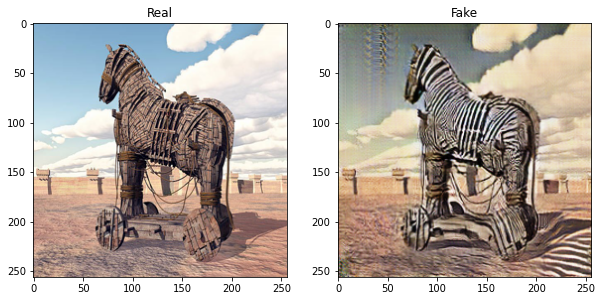

In [0]:
import matplotlib.pyplot as plt

imageCode = "troya"

resultsPath = "./results/horse2zebra_pretrained/test_latest/images/"
imageFake = "{}{}_fake.png".format(resultsPath, imageCode)
imageReal = "{}{}_real.png".format(resultsPath, imageCode)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Real')
img = plt.imread(imageReal)
plt.imshow(img)

plt.subplot(122)
plt.title('Fake')
img = plt.imread(imageFake)
plt.imshow(img)


In [0]:
!wget -O troya.jpg https://www.lampadia.com/assets/uploads_images/images/a1%28188%29.jpg

--2020-06-10 04:48:36--  https://www.lampadia.com/assets/uploads_images/images/a1%28188%29.jpg
Resolving www.lampadia.com (www.lampadia.com)... 104.130.23.133
Connecting to www.lampadia.com (www.lampadia.com)|104.130.23.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102676 (100K) [image/jpeg]
Saving to: ‘troya.jpg’

troya.jpg           100%[===================>] 100.27K   161KB/s    in 0.6s    

2020-06-10 04:48:38 (161 KB/s) - ‘troya.jpg’ saved [102676/102676]



In [0]:
!cp "troya.jpg" "./datasets/horse2zebra/testC/"

In [0]:
!ls ./datasets/horse2zebra/testC/

troya.jpg


In [0]:
!python test.py --dataroot datasets/horse2zebra/testC --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testC    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            